In [142]:
from PIL import Image
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from wordcloud import WordCloud
from scipy.stats import zscore
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler



In [143]:
sleep_dataset_raw = pd.read_csv('Data/student_sleep_patterns.csv')

# Data Analysis

In [153]:
duplikate = sleep_dataset_raw[sleep_dataset_raw.duplicated()]
if not duplikate.empty:
    print(f"Es gibt {duplikate.shape[0]} Duplikate im Datensatz.")
    print("Die Duplikate sind:")
    print(duplikate)
else:
    print("Es gibt keine Duplikate im Datensatz.")

Es gibt keine Duplikate im Datensatz.


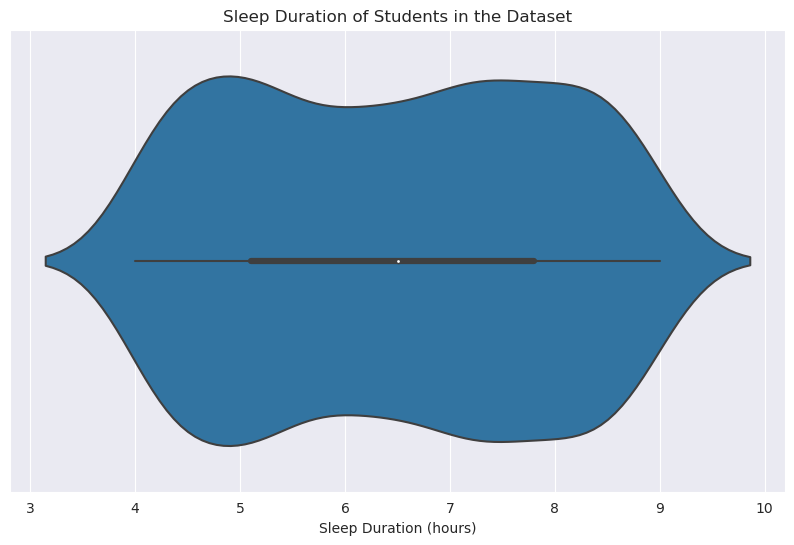

In [145]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=sleep_dataset_raw['Sleep_Duration'])
plt.title('Sleep Duration of Students in the Dataset')
plt.xlabel('Sleep Duration (hours)')
plt.show()

#man sieht je höchste niedrigste

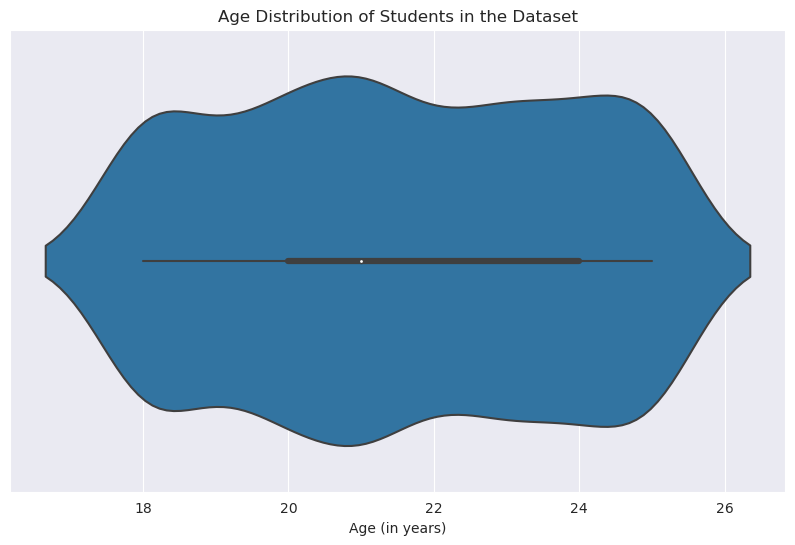

In [146]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=sleep_dataset_raw['Age'])
plt.title('Age Distribution of Students in the Dataset')
plt.xlabel('Age (in years)')
plt.show()

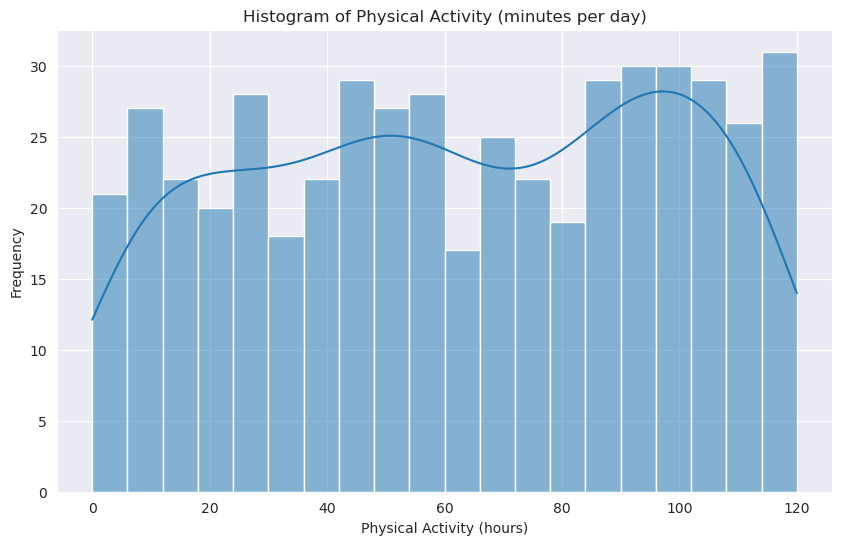

In [147]:
# Create a histogram for the physical activity
plt.figure(figsize=(10, 6))
sns.histplot(sleep_dataset_raw['Physical_Activity'], bins=20, kde=True)
plt.title('Histogram of Physical Activity (minutes per day)')
plt.xlabel('Physical Activity (hours)')
plt.ylabel('Frequency')
plt.show()

# Gut ausgeglichen, toll fürs lernen

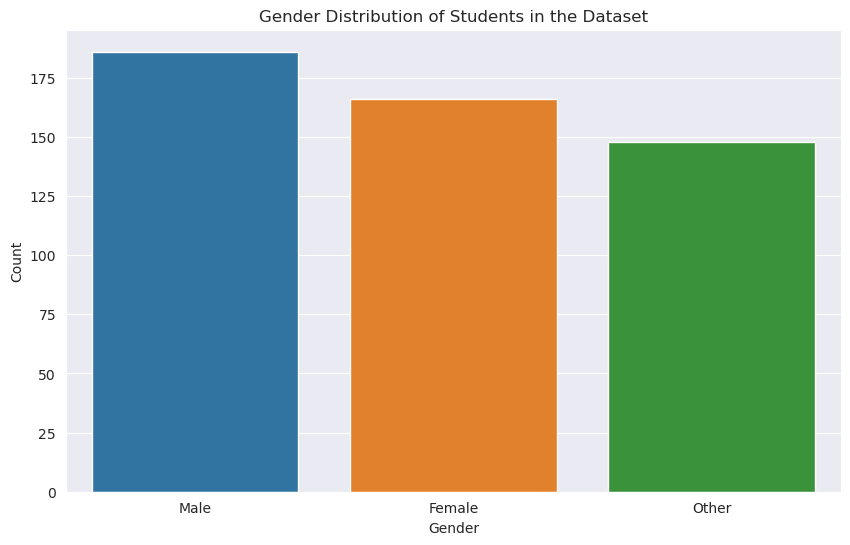

In [148]:
plt.figure(figsize=(10, 6))
sns.barplot(x=sleep_dataset_raw['Gender'].value_counts().index, y=sleep_dataset_raw['Gender'].value_counts().values)
plt.title('Gender Distribution of Students in the Dataset')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [149]:
z_scores = np.abs(zscore(sleep_dataset_raw.select_dtypes(include=[np.number])))
outliers = np.where(z_scores > 3)
if outliers[0].size > 0:
    print(f"Es gibt {len(outliers[0])} Ausreißer im Datensatz.")
    print("Die Ausreißer sind:")
    for location in zip(*outliers):
        print(sleep_dataset_raw.iloc[location])
else:
    print("Es gibt keine Ausreißer im Datensatz.")

Es gibt keine Ausreißer im Datensatz.


# Data Preprocessing

In [150]:
sleep_dataset = sleep_dataset_raw.drop(columns=['Student_ID'])

encoder = OneHotEncoder(sparse_output=False)
gender_encoded = encoder.fit_transform(sleep_dataset[['Gender']])
gender_encoded_df = pd.DataFrame(gender_encoded, columns=encoder.get_feature_names_out(['Gender']))
sleep_dataset = pd.concat([sleep_dataset, gender_encoded_df], axis=1)
sleep_dataset.drop('Gender', axis=1, inplace=True)

university_mapping = {'1st Year': 1, '2nd Year': 2, '3rd Year': 3, '4th Year': 4}
sleep_dataset['University_Year'] = sleep_dataset['University_Year'].map(university_mapping)

sleep_dataset.head()

,Age,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Gender_Female,Gender_Male,Gender_Other
0,24,2,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06,0.0,0.0,1.0
1,21,1,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21,0.0,1.0,0.0
2,22,4,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92,0.0,1.0,0.0
3,24,4,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42,0.0,0.0,1.0
4,20,4,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01,0.0,1.0,0.0


# Linear Regression

* Dit not work well -> data is not linear
* Try to use Random Forest Regressor

Mean Squared Error: 0.10067255692814253
R^2 Score: -0.04505657226145998


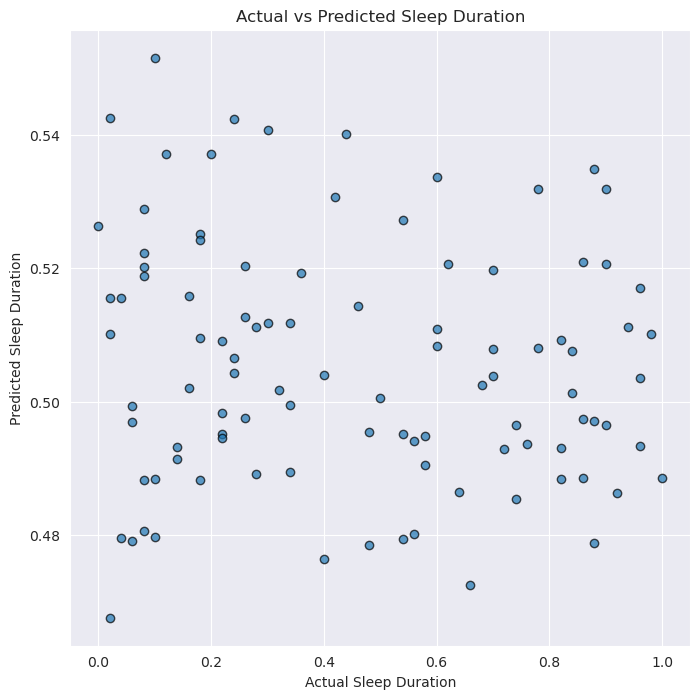

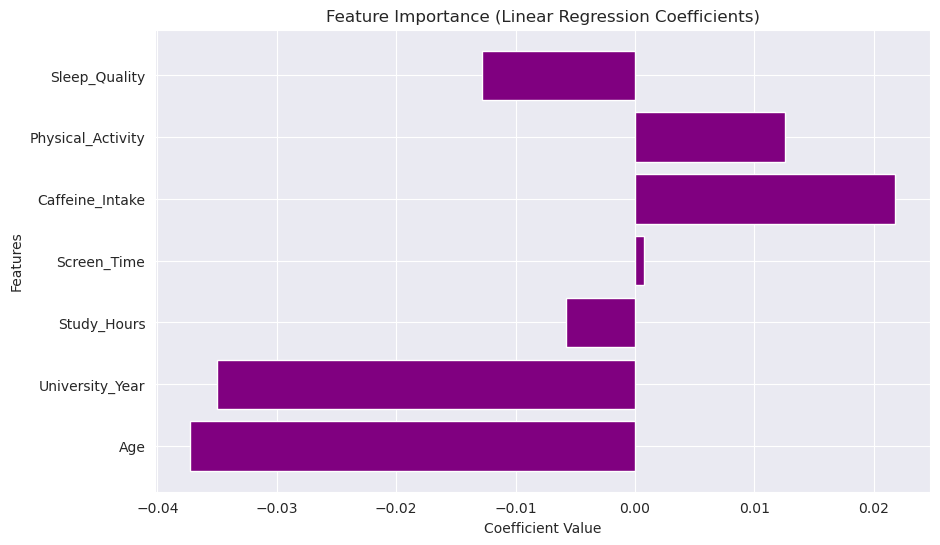

In [151]:
lin_reg_sleep_dataset = sleep_dataset.drop(columns=['Weekday_Sleep_End', 'Weekday_Sleep_Start', 'Weekend_Sleep_End', 'Weekend_Sleep_Start', 'Gender_Female', 'Gender_Male', 'Gender_Other'])

scaler = MinMaxScaler()
numeric_cols = lin_reg_sleep_dataset.select_dtypes(include=['float64', 'int64']).columns
lin_reg_sleep_dataset[numeric_cols] = scaler.fit_transform(lin_reg_sleep_dataset[numeric_cols])

X = lin_reg_sleep_dataset.drop(columns=['Sleep_Duration'])
y = lin_reg_sleep_dataset['Sleep_Duration']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

y_pred = linear_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.7, edgecolors='k')
plt.xlabel("Actual Sleep Duration")
plt.ylabel("Predicted Sleep Duration")
plt.title("Actual vs Predicted Sleep Duration")
plt.show()

coefficients = linear_reg.coef_
features = X.columns
plt.figure(figsize=(10, 6))
plt.barh(features, coefficients, color='purple')
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.xlabel("Coefficient Value")
plt.ylabel("Features")
plt.show()

# Decision Tree Classifier